# Regression for Used Car Prices in United States


## Team Background

- Project Grp 08

### Team Members

- Team member 1
    - Name: Richard Anton
    - Email: [rna63@drexel.edu](mailto:rna63@drexel.edu)
    
I am a MS CS student at Drexel. I expect to complete my degree in June 2023 at the end of the next quarter.
I have been a software developer since 1995, and have significant experience with Python.

I have some hands on experience with machine learning, and have taken machine learning, deep learning, artificial intellience, computer vision and DSCI-501 courses at Drexel.

I do not have as much background with exploratory data analysis. I do have a fairly solid mathematical background, including basic statistics.

A number of the prior projects that I have worked on have been focused on classification, for example of images or sentiment analysis of textual data.

Since much of my experience with handling data sets for machine learning problems has been through graduate CS courses, I have implemented them typically without a dependency on anything but NumPy and matplotlib for visualizing results, which means I have limited experience with existing common tools like scikit-learn. 

I am competent at using LaTex, but not an advanced user.

I have significant experience with NumPy and some experience using Pandas. I also have experience with matplotlib for visualizing aspects of data, but less with Seaborn.

The areas and skills I would like to grow through this project are:

1. More hands-on experience with scikit-learn and Pandas libraries.
2. More practice with visualization tools, such as matplotlib and Seaborn.
3. More practical experience with investigating a dataset, i.e. what data cleaning is needed and what relationships can be discovered in the data.
4. Experience with a practical machine learning regression problem.
5. Feature selection techniques to make machine learning problems more effective.

In [1]:
# setup imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

import random



In [2]:
sns.set(style="darkgrid")

In [3]:
from IPython.display import display, HTML

In [4]:
class Heading(object):
    template = """<div style="float: left; padding: 10px;">
    <h{size}>{0}</h{size}>
    </div>"""
    def __init__(self, txt, size):
        self.txt = txt
        self.size = size
        
    def _repr_html_(self):
        return self.template.format(self.txt, size=self.size)
    
    def __repr__(self):
        return self.txt

def show_heading(txt, size=2):
    display(Heading(txt, size=size))

In [5]:
#dataset_path = "craigslist_sampled_cleaned_2023_03_05_19_07_36.csv"
dataset_path = "craigslist_full_cleaned_2023_03_12_10_45_22.csv"

target_col = 'price'

In [6]:
# load dataset
orig_df = pd.read_csv(dataset_path)
df = orig_df.copy()
# show a sample for sanity check
df.head()

,price,year,make,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,6000.0,2011.406247,ford,f-150,good,6 cylinders,gas,92647.432999,clean,automatic,4wd,full-size,sedan,white,az
1,11900.0,2011.406247,ford,f-150,good,6 cylinders,gas,92647.432999,clean,automatic,4wd,full-size,sedan,white,ar
2,21000.0,2011.406247,ford,f-150,good,6 cylinders,gas,92647.432999,clean,automatic,4wd,full-size,sedan,white,fl
3,1500.0,2011.406247,ford,f-150,good,6 cylinders,gas,92647.432999,clean,automatic,4wd,full-size,sedan,white,ma
4,4900.0,2011.406247,ford,f-150,good,6 cylinders,gas,92647.432999,clean,automatic,4wd,full-size,sedan,white,nc


In [7]:
# split into input data and output values
X_all = df.drop(columns=[target_col])
y_all = df[target_col]

show_heading("X", size=2)
display(X_all)
show_heading("y", size=2)
display(y_all)

X

,year,make,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,2011.406247,ford,f-150,good,6 cylinders,gas,92647.432999,clean,automatic,4wd,full-size,sedan,white,az
1,2011.406247,ford,f-150,good,6 cylinders,gas,92647.432999,clean,automatic,4wd,full-size,sedan,white,ar
2,2011.406247,ford,f-150,good,6 cylinders,gas,92647.432999,clean,automatic,4wd,full-size,sedan,white,fl
3,2011.406247,ford,f-150,good,6 cylinders,gas,92647.432999,clean,automatic,4wd,full-size,sedan,white,ma
4,2011.406247,ford,f-150,good,6 cylinders,gas,92647.432999,clean,automatic,4wd,full-size,sedan,white,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393903,2019.000000,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.000000,clean,other,fwd,full-size,sedan,white,wy
393904,2020.000000,volvo,s60 t5 momentum sedan 4d,good,6 cylinders,gas,12029.000000,clean,other,fwd,full-size,sedan,red,wy
393905,2020.000000,cadillac,xt4 sport suv 4d,good,6 cylinders,diesel,4174.000000,clean,other,4wd,full-size,hatchback,white,wy
393906,2018.000000,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.000000,clean,other,fwd,full-size,sedan,silver,wy


y

0          6000.0
1         11900.0
2         21000.0
3          1500.0
4          4900.0
           ...   
393903    23590.0
393904    30590.0
393905    34990.0
393906    28990.0
393907    30590.0
Name: price, Length: 393908, dtype: float64

In [8]:
# import preprocessing from sklearn
from sklearn import preprocessing

In [9]:
# determine types of columns
numeric_cols = X_all.select_dtypes(include=['int', 'float']).columns
cat_cols = X_all.select_dtypes(include=['object']).columns
bool_cols = X_all.select_dtypes(include=['bool']).columns

show_heading("Column Types")

for col in X_all.columns:
    print(f"Column '{col}' dtype={X_all[col].dtype}")

print("numeric_cols:", numeric_cols)
print("cat_cols:", cat_cols)
print("bool_cols:", bool_cols)

all_cols = set()
all_cols = all_cols.union(set(numeric_cols))
all_cols = all_cols.union(set(cat_cols))
all_cols = all_cols.union(set(bool_cols))

check_cols = set(X_all.columns)

if all_cols != check_cols:
    print("ERROR! missing columns")
else:
    print("Column typing done.")

all_cols

Column Types

Column 'year' dtype=float64
Column 'make' dtype=object
Column 'model' dtype=object
Column 'condition' dtype=object
Column 'cylinders' dtype=object
Column 'fuel' dtype=object
Column 'odometer' dtype=float64
Column 'title_status' dtype=object
Column 'transmission' dtype=object
Column 'drive' dtype=object
Column 'size' dtype=object
Column 'type' dtype=object
Column 'paint_color' dtype=object
Column 'state' dtype=object
numeric_cols: Index(['year', 'odometer'], dtype='object')
cat_cols: Index(['make', 'model', 'condition', 'cylinders', 'fuel', 'title_status',
       'transmission', 'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')
bool_cols: Index([], dtype='object')
Column typing done.


{'condition',
 'cylinders',
 'drive',
 'fuel',
 'make',
 'model',
 'odometer',
 'paint_color',
 'size',
 'state',
 'title_status',
 'transmission',
 'type',
 'year'}

In [10]:
# We are using category_encoders package for one-hot encoding.
# https://contrib.scikit-learn.org/category_encoders/

# uncomment and run this if needed.
!pip install category_encoders

In [11]:
# TODO: cleanup testing out one hot
#enc = preprocessing.OneHotEncoder()
#enc.fit(X)

import category_encoders as ce

In [12]:
# encode the categorical variables as one-hot
# one_hot_enc = ce.OneHotEncoder(cols=cat_cols,use_cat_names=True)
# X_all = one_hot_enc.fit_transform(X_all)
# X_all.head()

In [13]:
# normalize the numerical columns
from sklearn.preprocessing import StandardScaler

# TODO: remove if not using.
def normalize_numeric_cols(df):
    
    for col in numeric_cols:
        # TODO: is this the kind of scalar we want?
        scaler = StandardScaler()

        scaler.fit(np.array(df[col]).reshape(-1,1))
        df[col] = scaler.transform(np.array(df[col]).reshape(-1,1))
    
    return df


In [14]:
# Convert categorical columns to Pandas category type

# TODO; make sure this exclude's boolean columns
cats = X_all.select_dtypes(exclude=np.number).columns.tolist()
print("cats:")
display(cats)
for col in cats:
    X_all[col] = X_all[col].astype('category')

display(X_all.dtypes)
display(X_all.head())

cats:


['make',
 'model',
 'condition',
 'cylinders',
 'fuel',
 'title_status',
 'transmission',
 'drive',
 'size',
 'type',
 'paint_color',
 'state']

year             float64
make            category
model           category
condition       category
cylinders       category
fuel            category
odometer         float64
title_status    category
transmission    category
drive           category
size            category
type            category
paint_color     category
state           category
dtype: object

,year,make,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,2011.406247,ford,f-150,good,6 cylinders,gas,92647.432999,clean,automatic,4wd,full-size,sedan,white,az
1,2011.406247,ford,f-150,good,6 cylinders,gas,92647.432999,clean,automatic,4wd,full-size,sedan,white,ar
2,2011.406247,ford,f-150,good,6 cylinders,gas,92647.432999,clean,automatic,4wd,full-size,sedan,white,fl
3,2011.406247,ford,f-150,good,6 cylinders,gas,92647.432999,clean,automatic,4wd,full-size,sedan,white,ma
4,2011.406247,ford,f-150,good,6 cylinders,gas,92647.432999,clean,automatic,4wd,full-size,sedan,white,nc


## Data Dictionary

These are the columns we used from the Craigslist dataset.

|     Name     |  dtype   | Description | Null % | Notes |
|--------------|----------|--------------|--------------|--------------|
| price | float64 | Listed sale price | 0.0 |  | 
| year | float64 | Year of manufacture | 0.002823 | n/a |
| make | category | Auto manufacturer name | 0.041337 | Renamed from manufacturer |
| model | category | Car model name | 0.012362 | n/a |
| condition | category | Listed condition of vehicle | 0.407852 | n/a |
| cylinders | category | Number of engine cylinders | 0.416225 | n/a |
| fuel | category | Type of fuel used by vehicle (i.e. gas, deisel, electric) | 0.007058 | n/a |
| odometer | float64 | Odometer mileage of vehicle | 0.010307 | n/a |
| title_status | category | Status of vehicle title (i.e. clean, salvage) | 0.019308 | n/a |
| transmission | category | Type of vehicle transmission (i.e. automatic, manual) | 0.005988 | n/a |
| drive | category | Drive type of vehicle (i.e. fwd, 4wd) | 0.305863 | n/a |
| size | category | Size of vehicle(i.e. full-size) | 0.717675 | n/a |
| type | category | Vehicle type, (i.e. sedan,pickup) | 0.217527 | n/a |
| paint_color | category | Exterior paint color of vehicle | 0.305011 | n/a |
| state | category | State of vehicle location(i.e. WA, PI) | 0.000000 | n/a |

### Unused Columns

These columns we dropped after EDA before cleaning the data set.


    'id', 'url', 'region', 'VIN', 'region_url', 'county', 'lat', 'long', 'description', 'image_url', 'posting_date'
    
    
We dropped id, url, VIN, image_url because they are likely unique to each listing and uninformative.

We dropped posting_date because the dataset only has data from a limited time frame so this field is not likely to have a long enough date range to determine things like seasonality.


We dropped the columns region, region_url, county, lat, and long so that we could just use state as a single more easily usable column for the effect of the vehicle location on price.



In [15]:
# normalize_numeric_cols(X_all)
# X_all[numeric_cols]

In [16]:
# Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=193)


In [17]:
# # try a model to see how it works as a baseline
from sklearn.ensemble import  RandomForestRegressor
from sklearn.metrics import mean_squared_error
# rf_model = RandomForestRegressor(max_depth=10)
# rf_model.fit(X_train, y_train)

In [18]:
# predict_train = rf_model.predict(X_train)
# predict_test  = rf_model.predict(X_test)

In [19]:
# print('RMSE of train data: ', mean_squared_error(y_train, predict_train)**(0.5))
# print('RMSE of test data: ',  mean_squared_error(y_test, predict_test)**(0.5))

In [20]:
# plt.figure(figsize=(20,4))
# feat_importances = pd.Series(rf_model.feature_importances_, index = X_train.columns)
# feat_importances.nlargest(6).plot(kind='barh');

In [21]:
# do that over as a pipeline

In [22]:
from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [23]:
# encode the categorical variables as one-hot
# one_hot_enc = ce.OneHotEncoder(cols=cat_cols,use_cat_names=True)
# X_all = one_hot_enc.fit_transform(X_all)
# X_all.head()



In [24]:
# TODO: try ("selector", SelectPercentile(chi2, percentile=50)),

# TODO: try embedding instead
# https://github.com/cpa-analytics/embedding-encoder

# TODO: switching to LeaveOneOut becuase it makes feature importance output easier.
pre_process = ColumnTransformer(remainder='passthrough',
                                transformers=[
                                    ("one_hot_encoder", OneHotEncoder(handle_unknown="ignore"), cat_cols),
                                    #("leave_one_out_encoder", ce.LeaveOneOutEncoder(return_df=False), cat_cols),
                                    ('scale_data', StandardScaler(), numeric_cols)
                                ])

In [25]:
# now let's add the XGBoost version
# TODO: adapt this into the pipeline.
#!pip install --user xgboost

# try to get an up to date version.
#!pip install --user --upgrade xgboost

In [26]:
import xgboost as xgb

In [27]:
# NOTE: On my mac that gets me an XGBoost version with no GPU support,
# so I had to check out from Git and build it manually.

# on the Mac GPUs (at least on my M2 macbook air), the CUDA libraries that XGBoost uses do not support the GPU.
# This means we are stuck with CPU for XGBoost or run it on something else.
import platform
platform.processor()
plat = platform.system()
print("Platform: ", plat)


Platform:  Darwin


In [28]:
xgb_pre_process = pre_process 

# hyperparameters for XGBoost
# set objective and enable GPU acceleration if available.
plat = platform.system()

# TODO: fix,
# if plat == 'Darwin':
#     params = {"objective": "reg:squarederror"}
# else:
#     params = {"objective": "reg:squarederror", "tree_method": "gpu_hist"}
params = {"objective": "reg:squarederror"}

# Use "gpu_hist" for training the model.
xgb_reg = xgb.XGBRegressor(objective="reg:squarederror")


In [29]:
# Setup pipelines for comparison


linear_pipeline = Pipeline(steps=[
                                  ('pre_processing',pre_process),
                                  ('reg', LinearRegression())
                                 ])

ridge_pipeline = Pipeline(steps=[('pre_processing',pre_process),
                                 
                                 ('reg', SGDRegressor(penalty="l2"))
                                 ])

lasso_pipeline = Pipeline(steps=[('pre_processing',pre_process),
                                 ('reg', SGDRegressor(penalty="l1"))
                                 ])


rf_pipeline = Pipeline(steps=[('pre_processing',pre_process),
                                 ('reg', RandomForestRegressor(max_depth=10,random_state=191))
                                 ])


xgb_pipeline = Pipeline(steps=[('xgb_pre_processing',xgb_pre_process),
                                 ('reg', xgb_reg)
                                 ])

pipelines = {
    'linear':linear_pipeline,
    'ridge': ridge_pipeline,
    'lasso': lasso_pipeline,
    'random_forest': rf_pipeline,
    'xgboost': xgb_pipeline
}


In [30]:
from sklearn.model_selection import cross_validate

In [31]:
def cross_validate_pipeline(label, pipeline):    
    # scoring = "neg_mean_absolute_percentage_error"
    scoring = "neg_mean_squared_error"
    n_cv_folds = 3

    print("cross validate for:", label)
    result = cross_validate(pipeline, X_all, y_all, cv=n_cv_folds, scoring=scoring)
    display(result)

    return result

In [32]:
# #Display some prediction samples
# samples = X_test.copy()
# samples[target_col] = y_test
# #pd.concat([y_test, X_test],axis=0)
# samples['predicted_price'] = predictions

# display(samples)


In [33]:
def plot_residuals(predict_train, predict_test):

    plt.scatter(
        predict_train,
        predict_train - y_train,
        c='blue',
        marker='o',
        label='Training data')

    plt.scatter(
        predict_test,
        predict_test - y_test,
        c='lightgreen',
        marker='s',
        label='Test data')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=-15000, xmax=55000, lw=2, color='red')
    #plt.xlim([-10, 50])
    plt.tight_layout()
    plt.show()



In [34]:

def show_samples(X_vals, y_vals, predictions):
    samples = X_vals.copy()
    samples[target_col] = y_vals
    samples['predicted_price'] = predictions
    display(samples)

    

In [35]:
from sklearn.metrics import r2_score

def score_pipeline(pipeline):
    predict_train = pipeline.predict(X_train)
    predict_test = pipeline.predict(X_test)
    
    score = pipeline.score(X_test, y_test)
    r2 = r2_score(y_test, predict_test)
    
    train_rmse = mean_squared_error(y_train, predict_train)**(0.5)
    test_rmse = mean_squared_error(y_test, predict_test)**(0.5)
    
    print('RMSE of train data: ', train_rmse)
    print('RMSE of test data: ',  test_rmse)
    print("model score: %.3f" % score)
    print("R2 score", r2)
    
    scores = {
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'score': score,
        'r2_score': r2, 
    }
    results = {
        'scores':scores,
        'predict_train': predict_train,
        'predict_test': predict_test
    }
    print("scores:", scores)
    return results

In [36]:
# TODO: save the model(s)

import joblib
#joblib.dump(model, './rf_model.pkl')

# load the model somewhere else
# In other notebooks 
#model = joblib.load('PATH/TO/rf_model.pkl')
#new_prediction = model.predict(new_data)

In [37]:
def eval_pipeline(label, pipeline):
    cross_validate_pipeline(label, pipeline)
    
    rmod = pipeline.fit(X_train,y_train)
    display(rmod)
    
    results = score_pipeline(pipeline)
     
    show_samples(X_test, y_test, results['predict_test'])
    plot_residuals(results['predict_train'], results['predict_test'])
    
    return rmod, results

Evaluating linear

cross validate for: linear


{'fit_time': array([ 8.88208795, 10.11194396,  9.07017303]),
 'score_time': array([0.17292213, 0.17038107, 0.17436528]),
 'test_score': array([-7.19701281e+07, -1.35943948e+08, -1.66982678e+08])}

Pipeline(steps=[('pre_processing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['make', 'model', 'condition', 'cylinders', 'fuel', 'title_status',
       'transmission', 'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')),
                                                 ('scale_data',
                                                  StandardScaler(),
                                                  Index(['year', 'odometer'], dtype='object'))])),
                ('reg', LinearRegression())])

RMSE of train data:  6456.24166019595
RMSE of test data:  7201.659534204902
model score: 0.744
R2 score 0.7436947354564545
scores: {'train_rmse': 6456.24166019595, 'test_rmse': 7201.659534204902, 'score': 0.7436947354564545, 'r2_score': 0.7436947354564545}


,year,make,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,price,predicted_price
373916,2017.0,ford,edge sel awd gas suv auto,good,6 cylinders,gas,28669.0,clean,automatic,4wd,full-size,SUV,white,wa,25999.0,25377.851460
379496,2018.0,mitsubishi,outlander,good,6 cylinders,gas,76935.0,clean,automatic,4wd,full-size,SUV,black,wa,18999.0,19616.974809
99114,2011.0,chevrolet,impala,fair,6 cylinders,gas,172000.0,clean,automatic,4wd,full-size,sedan,white,fl,3800.0,2979.288157
359203,2018.0,nissan,frontier,excellent,6 cylinders,gas,55020.0,clean,automatic,4wd,mid-size,pickup,red,vt,23998.0,23816.293046
105068,2012.0,hyundai,veloster,good,4 cylinders,gas,170000.0,clean,automatic,fwd,full-size,sedan,white,fl,1495.0,81.927880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245394,2011.0,kia,sorento,like new,6 cylinders,gas,132000.0,clean,automatic,4wd,full-size,SUV,white,ny,8950.0,7414.851403
137137,2015.0,gmc,terrain,good,4 cylinders,gas,90927.0,clean,automatic,fwd,full-size,SUV,grey,il,11495.0,13896.115024
75433,2008.0,ford,focus,good,4 cylinders,gas,130000.0,clean,automatic,fwd,full-size,sedan,silver,ct,3300.0,209.372351
222443,2004.0,ford,f-150,excellent,8 cylinders,gas,174000.0,clean,automatic,4wd,full-size,pickup,white,nc,10500.0,13669.965710


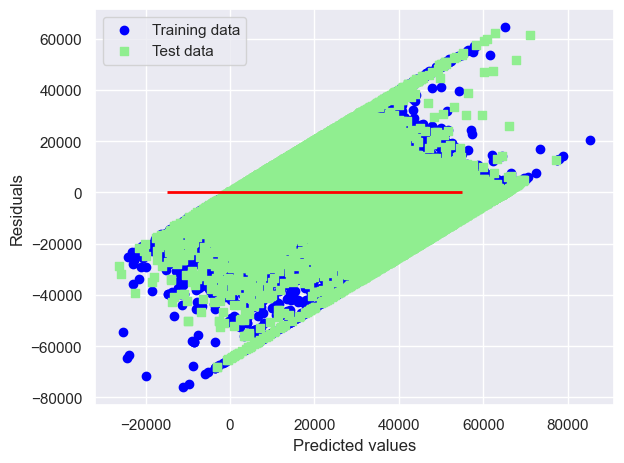

Evaluating ridge

cross validate for: ridge


{'fit_time': array([24.83439207, 24.80679488, 25.83252096]),
 'score_time': array([0.17364979, 0.17375827, 0.17405915]),
 'test_score': array([-76639980.2610443 , -59393766.78850544, -71173121.12770246])}

Pipeline(steps=[('pre_processing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['make', 'model', 'condition', 'cylinders', 'fuel', 'title_status',
       'transmission', 'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')),
                                                 ('scale_data',
                                                  StandardScaler(),
                                                  Index(['year', 'odometer'], dtype='object'))])),
                ('reg', SGDRegressor())])

RMSE of train data:  7896.514062535097
RMSE of test data:  7994.812029783744
model score: 0.684
R2 score 0.6841296441403057
scores: {'train_rmse': 7896.514062535097, 'test_rmse': 7994.812029783744, 'score': 0.6841296441403057, 'r2_score': 0.6841296441403057}


,year,make,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,price,predicted_price
373916,2017.0,ford,edge sel awd gas suv auto,good,6 cylinders,gas,28669.0,clean,automatic,4wd,full-size,SUV,white,wa,25999.0,30367.529873
379496,2018.0,mitsubishi,outlander,good,6 cylinders,gas,76935.0,clean,automatic,4wd,full-size,SUV,black,wa,18999.0,21213.163430
99114,2011.0,chevrolet,impala,fair,6 cylinders,gas,172000.0,clean,automatic,4wd,full-size,sedan,white,fl,3800.0,2405.552255
359203,2018.0,nissan,frontier,excellent,6 cylinders,gas,55020.0,clean,automatic,4wd,mid-size,pickup,red,vt,23998.0,23744.387171
105068,2012.0,hyundai,veloster,good,4 cylinders,gas,170000.0,clean,automatic,fwd,full-size,sedan,white,fl,1495.0,-1794.375624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245394,2011.0,kia,sorento,like new,6 cylinders,gas,132000.0,clean,automatic,4wd,full-size,SUV,white,ny,8950.0,8208.116536
137137,2015.0,gmc,terrain,good,4 cylinders,gas,90927.0,clean,automatic,fwd,full-size,SUV,grey,il,11495.0,12532.189816
75433,2008.0,ford,focus,good,4 cylinders,gas,130000.0,clean,automatic,fwd,full-size,sedan,silver,ct,3300.0,-618.813198
222443,2004.0,ford,f-150,excellent,8 cylinders,gas,174000.0,clean,automatic,4wd,full-size,pickup,white,nc,10500.0,15275.003587


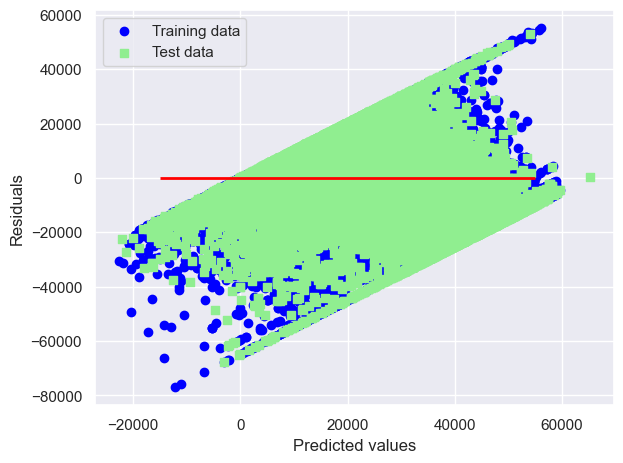

Evaluating lasso

cross validate for: lasso


/opt/homebrew/Caskroom/miniconda/base/envs/ds/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/ds/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/ds/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


{'fit_time': array([48.5191927 , 49.90547705, 49.72498918]),
 'score_time': array([0.17502308, 0.16971087, 0.16962004]),
 'test_score': array([-72539206.82939696, -56065156.16746081, -66474545.74037549])}

/opt/homebrew/Caskroom/miniconda/base/envs/ds/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Pipeline(steps=[('pre_processing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['make', 'model', 'condition', 'cylinders', 'fuel', 'title_status',
       'transmission', 'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')),
                                                 ('scale_data',
                                                  StandardScaler(),
                                                  Index(['year', 'odometer'], dtype='object'))])),
                ('reg', SGDRegressor(penalty='l1'))])

RMSE of train data:  7302.949341033448
RMSE of test data:  7512.166810855107
model score: 0.721
R2 score 0.7211165121809523
scores: {'train_rmse': 7302.949341033448, 'test_rmse': 7512.166810855107, 'score': 0.7211165121809523, 'r2_score': 0.7211165121809523}


,year,make,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,price,predicted_price
373916,2017.0,ford,edge sel awd gas suv auto,good,6 cylinders,gas,28669.0,clean,automatic,4wd,full-size,SUV,white,wa,25999.0,28916.063775
379496,2018.0,mitsubishi,outlander,good,6 cylinders,gas,76935.0,clean,automatic,4wd,full-size,SUV,black,wa,18999.0,20375.477865
99114,2011.0,chevrolet,impala,fair,6 cylinders,gas,172000.0,clean,automatic,4wd,full-size,sedan,white,fl,3800.0,2262.516724
359203,2018.0,nissan,frontier,excellent,6 cylinders,gas,55020.0,clean,automatic,4wd,mid-size,pickup,red,vt,23998.0,23799.100776
105068,2012.0,hyundai,veloster,good,4 cylinders,gas,170000.0,clean,automatic,fwd,full-size,sedan,white,fl,1495.0,-1365.559233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245394,2011.0,kia,sorento,like new,6 cylinders,gas,132000.0,clean,automatic,4wd,full-size,SUV,white,ny,8950.0,8091.613097
137137,2015.0,gmc,terrain,good,4 cylinders,gas,90927.0,clean,automatic,fwd,full-size,SUV,grey,il,11495.0,13005.314106
75433,2008.0,ford,focus,good,4 cylinders,gas,130000.0,clean,automatic,fwd,full-size,sedan,silver,ct,3300.0,-112.253399
222443,2004.0,ford,f-150,excellent,8 cylinders,gas,174000.0,clean,automatic,4wd,full-size,pickup,white,nc,10500.0,15198.687752


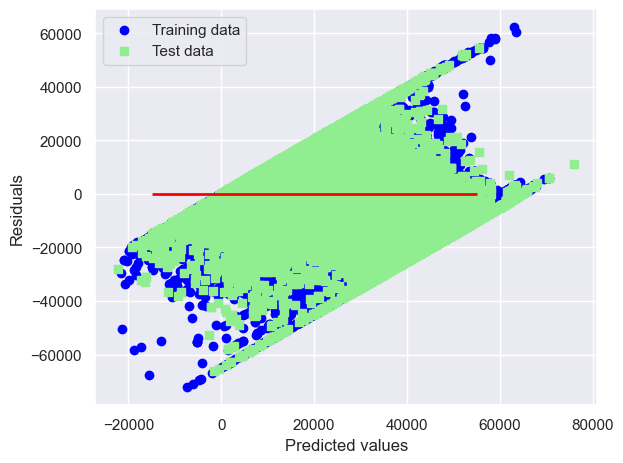

Evaluating random_forest

cross validate for: random_forest


{'fit_time': array([122.189785  , 124.29857612, 123.14193511]),
 'score_time': array([0.78275204, 0.78544307, 0.82306099]),
 'test_score': array([-73128326.53795086, -57013734.37640717, -68708431.26695243])}

Pipeline(steps=[('pre_processing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['make', 'model', 'condition', 'cylinders', 'fuel', 'title_status',
       'transmission', 'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')),
                                                 ('scale_data',
                                                  StandardScaler(),
                                                  Index(['year', 'odometer'], dtype='object'))])),
                ('reg', RandomForestRegressor(max_depth=10, random_state=191))])

RMSE of train data:  7716.302885302759
RMSE of test data:  7831.58202896849
model score: 0.697
R2 score 0.6968962165516847
scores: {'train_rmse': 7716.302885302759, 'test_rmse': 7831.58202896849, 'score': 0.6968962165516847, 'r2_score': 0.6968962165516847}


,year,make,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,price,predicted_price
373916,2017.0,ford,edge sel awd gas suv auto,good,6 cylinders,gas,28669.0,clean,automatic,4wd,full-size,SUV,white,wa,25999.0,29906.533979
379496,2018.0,mitsubishi,outlander,good,6 cylinders,gas,76935.0,clean,automatic,4wd,full-size,SUV,black,wa,18999.0,22592.897989
99114,2011.0,chevrolet,impala,fair,6 cylinders,gas,172000.0,clean,automatic,4wd,full-size,sedan,white,fl,3800.0,10174.097273
359203,2018.0,nissan,frontier,excellent,6 cylinders,gas,55020.0,clean,automatic,4wd,mid-size,pickup,red,vt,23998.0,29105.598735
105068,2012.0,hyundai,veloster,good,4 cylinders,gas,170000.0,clean,automatic,fwd,full-size,sedan,white,fl,1495.0,6127.289598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245394,2011.0,kia,sorento,like new,6 cylinders,gas,132000.0,clean,automatic,4wd,full-size,SUV,white,ny,8950.0,10967.242632
137137,2015.0,gmc,terrain,good,4 cylinders,gas,90927.0,clean,automatic,fwd,full-size,SUV,grey,il,11495.0,11740.977672
75433,2008.0,ford,focus,good,4 cylinders,gas,130000.0,clean,automatic,fwd,full-size,sedan,silver,ct,3300.0,6189.568493
222443,2004.0,ford,f-150,excellent,8 cylinders,gas,174000.0,clean,automatic,4wd,full-size,pickup,white,nc,10500.0,7244.964194


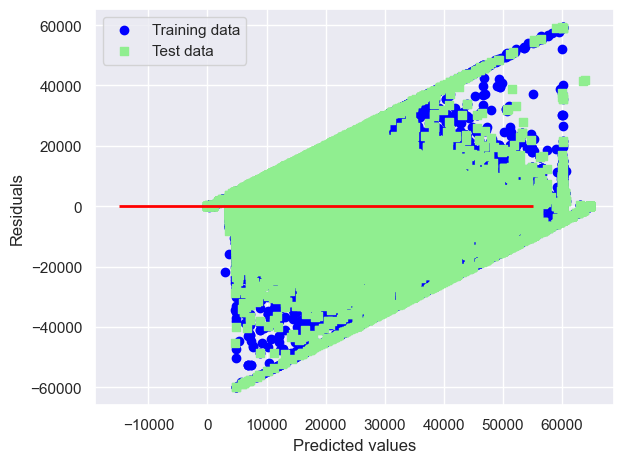

Evaluating xgboost

cross validate for: xgboost


{'fit_time': array([11.71939993, 12.25917983, 12.3431561 ]),
 'score_time': array([0.25899696, 0.25760913, 0.27156687]),
 'test_score': array([-61332653.71716239, -45548365.99437444, -56700890.27631681])}

Pipeline(steps=[('xgb_pre_processing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['make', 'model', 'condition', 'cylinders', 'fuel', 'title_status',
       'transmission', 'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')),
                                                 ('scale_data',
                                                  StandardScaler(),
                                                  Index(['year', 'odomete...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

RMSE of train data:  6749.069232782221
RMSE of test data:  6879.05150854996
model score: 0.766
R2 score 0.7661434826233868
scores: {'train_rmse': 6749.069232782221, 'test_rmse': 6879.05150854996, 'score': 0.7661434826233868, 'r2_score': 0.7661434826233868}


,year,make,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,price,predicted_price
373916,2017.0,ford,edge sel awd gas suv auto,good,6 cylinders,gas,28669.0,clean,automatic,4wd,full-size,SUV,white,wa,25999.0,31513.830078
379496,2018.0,mitsubishi,outlander,good,6 cylinders,gas,76935.0,clean,automatic,4wd,full-size,SUV,black,wa,18999.0,19275.755859
99114,2011.0,chevrolet,impala,fair,6 cylinders,gas,172000.0,clean,automatic,4wd,full-size,sedan,white,fl,3800.0,4746.722656
359203,2018.0,nissan,frontier,excellent,6 cylinders,gas,55020.0,clean,automatic,4wd,mid-size,pickup,red,vt,23998.0,31775.689453
105068,2012.0,hyundai,veloster,good,4 cylinders,gas,170000.0,clean,automatic,fwd,full-size,sedan,white,fl,1495.0,5084.328125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245394,2011.0,kia,sorento,like new,6 cylinders,gas,132000.0,clean,automatic,4wd,full-size,SUV,white,ny,8950.0,7520.594727
137137,2015.0,gmc,terrain,good,4 cylinders,gas,90927.0,clean,automatic,fwd,full-size,SUV,grey,il,11495.0,10394.301758
75433,2008.0,ford,focus,good,4 cylinders,gas,130000.0,clean,automatic,fwd,full-size,sedan,silver,ct,3300.0,4368.653320
222443,2004.0,ford,f-150,excellent,8 cylinders,gas,174000.0,clean,automatic,4wd,full-size,pickup,white,nc,10500.0,8290.727539


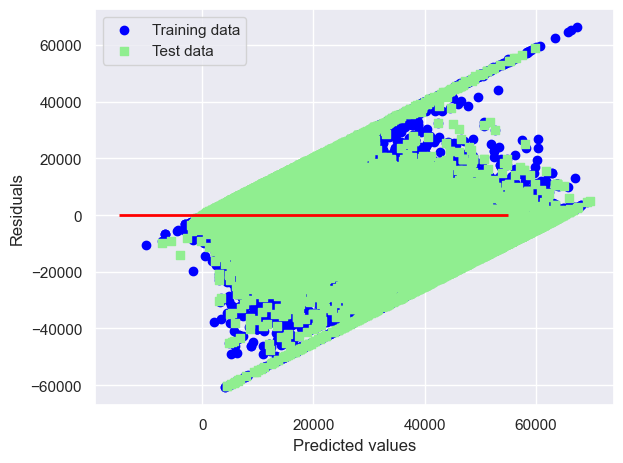

In [38]:
all_results = []
for label, pipeline in pipelines.items():
    show_heading(f"Evaluating {label}", 2)
    rmod, results = eval_pipeline(label, pipeline)
    scores = {'label': label}
    scores.update(results['scores'])
    all_results.append(scores)

In [39]:
df = pd.DataFrame.from_dict(all_results)

show_heading("Pipeline Score Summary")
display(df)

Pipeline Score Summary

,label,train_rmse,test_rmse,score,r2_score
0,linear,6456.241660,7201.659534,0.743695,0.743695
1,ridge,7896.514063,7994.812030,0.684130,0.684130
2,lasso,7302.949341,7512.166811,0.721117,0.721117
3,random_forest,7716.302885,7831.582029,0.696896,0.696896
4,xgboost,6749.069233,6879.051509,0.766143,0.766143


In [40]:
# calculate and plot the feature importance for random forest model.
rf_pipeline = pipelines['random_forest']

rf_model = rf_pipeline['reg']
importances = rf_model.feature_importances_
display(importances.shape)

(25285,)

In [41]:
# TODO: this is broken, may drop it if not time.
# IT is also running my machine out of memory.


# Calculate the permutation importance using the random forest.
# The docs describing this are at: 
# https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance.html

from sklearn.inspection import permutation_importance

def calc_permutation_importance():
    #X_pre_train = pre_process.fit_transform(X_train)
    X_pre_test =  pre_process.transform(X_test)

    X_pre_test = X_pre_test.toarray()
    result = permutation_importance(
        rf_model, X_pre_test, y_test, n_repeats=5, random_state=4093, n_jobs=8
    )

    dfc = pd.DataFrame(data=X_pre_test)
    columns = dfc.columns
    display(columns)


    sorted_importances_idx = result.importances_mean.argsort()
    importances = pd.DataFrame(
        result.importances[sorted_importances_idx].T,
        columns=columns[sorted_importances_idx],
    )
    ax = importances.plot.box(vert=False, whis=10)
    ax.set_title("Permutation Importances (test set)")
    ax.axvline(x=0, color="k", linestyle="--")
    ax.set_xlabel("Decrease in accuracy score")
    ax.figure.tight_layout()

#calc_permutation_importance()


In [52]:
def xgboost_fit(X_train, y_train, X_test, y_test, enable_cat, n_rounds = 5000):
    # This is the non pipeline version for helping with measuring feature importance.

    # Convert to the format XGBoost lib expects.
    dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=enable_cat)
    dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=enable_cat)

    evals = [(dtest_reg, "validation"), (dtrain_reg, "train")]

    model = xgb.train(
      params=params,
      dtrain=dtrain_reg,
      num_boost_round=n_rounds,
      evals=evals,
      verbose_eval=100, # Every N rounds
      early_stopping_rounds=10  # stop if no improvement to validation loss in 50 rounds.
    )

    predict_test = model.predict(dtest_reg)
    predict_train = model.predict(dtrain_reg)
    
    print('RMSE of train data: ', mean_squared_error(y_train, predict_train)**(0.5))
    print('RMSE of test data: ',  mean_squared_error(y_test, predict_test)**(0.5))

    r2 = r2_score(y_test, predict_test)
    print('R2 Score of test data:', r2)
        
    return model
# xgboost_fit() 

In [43]:
# Train a separate model to do feature importance
model = xgboost_fit() 

[0]	validation-rmse:17700.86754	train-rmse:17661.88350
[100]	validation-rmse:6100.74218	train-rmse:5873.59282
[200]	validation-rmse:5653.11306	train-rmse:5257.61411
[300]	validation-rmse:5402.39979	train-rmse:4871.89035
[400]	validation-rmse:5242.90728	train-rmse:4601.22411
[500]	validation-rmse:5131.17404	train-rmse:4390.49616
[600]	validation-rmse:5037.30064	train-rmse:4190.51707
[700]	validation-rmse:4973.39636	train-rmse:4035.86663
[800]	validation-rmse:4919.43947	train-rmse:3893.57798
[900]	validation-rmse:4861.64471	train-rmse:3765.87730
[1000]	validation-rmse:4814.91821	train-rmse:3643.49928
[1100]	validation-rmse:4775.78189	train-rmse:3542.98739
[1200]	validation-rmse:4743.45590	train-rmse:3447.64792
[1300]	validation-rmse:4712.75767	train-rmse:3352.91246
[1400]	validation-rmse:4690.51312	train-rmse:3272.21755
[1500]	validation-rmse:4667.23180	train-rmse:3196.13963
[1600]	validation-rmse:4644.00875	train-rmse:3125.11321
[1700]	validation-rmse:4626.78232	train-rmse:3058.97079
[1

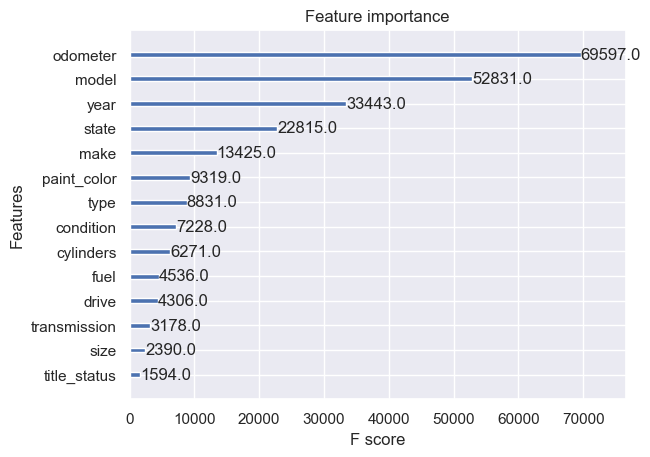

In [44]:
n_features_max = 50

from xgboost import plot_importance
plot_importance(model, max_num_features=20)

# Alternate version
if False:
    feature_important = model.get_score(importance_type='weight')
    keys = list(feature_important.keys())
    values = list(feature_important.values())

    data = pd.DataFrame(data=values, index=keys, columns=["score"])
    data = data.sort_values(by = "score")#, ascending=False)

    display(data)

    plt.barh(data.index, data['score'])
    plt.xlabel("Xgboost Feature Importance")


In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
    
n_pca_comp = 10

# Using LeaveOneOut and PCA
cat_encoder = Pipeline([
    ('LOO', ce.LeaveOneOutEncoder(return_df=False)),
    ('PCA', PCA(n_components = n_pca_comp,random_state=193))
])

alt_pre_process = ColumnTransformer(remainder='passthrough',
                                transformers=[
                                    #("leave_one_out_encoder", ce.LeaveOneOutEncoder(return_df=False), cat_cols),
                                    ("cat_encoder", cat_encoder, cat_cols),
                                    ('scale_data', StandardScaler(), numeric_cols),
                                ])

In [48]:
def train_random_forest(xreg_train, yreg_train, xreg_test, yreg_test):


    RF_regressor = Pipeline([('pre_processing',alt_pre_process),
                             ('reg', RandomForestRegressor(max_depth=15,random_state=191))])

    RF_regressor.fit(xreg_train, yreg_train)

    predict_train = RF_regressor.predict(xreg_train)
    predict_test = RF_regressor.predict(xreg_test)

    train_rmse = mean_squared_error(yreg_train, predict_train)**(0.5)
    test_rmse = mean_squared_error(yreg_test, predict_test)**(0.5)
  
    score = pipeline.score(X_test, y_test)
    r2 = r2_score(y_test, predict_test)
    
    train_rmse = mean_squared_error(y_train, predict_train)**(0.5)
    test_rmse = mean_squared_error(y_test, predict_test)**(0.5)
    
    print('RMSE of train data: ', train_rmse)
    print('RMSE of test data: ',  test_rmse)
    print("model score: %.3f" % score)
    print("R2 score", r2)
    
    
    return RF_regressor


#alt_pre_process.fit(X_train, y_train)

# PCA Does not support sparse input.
# if False: # NEEDED for one hot encoder
#     X_pre_train =  alt_pre_process.transform(X_train).toarray()
#     X_pre_test =  alt_pre_process.transform(X_test).toarray()

In [49]:
print("Random Forest")
train_random_forest(X_train, y_train, X_test, y_test)    


Random Forest
RMSE of train data:  4810.785364020331
RMSE of test data:  5715.183210629658
model score: 0.766
R2 score 0.8385817371382678


Pipeline(steps=[('pre_processing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_encoder',
                                                  Pipeline(steps=[('LOO',
                                                                   LeaveOneOutEncoder(return_df=False)),
                                                                  ('PCA',
                                                                   PCA(n_components=10,
                                                                       random_state=193))]),
                                                  Index(['make', 'model', 'condition', 'cylinders', 'fuel', 'title_status',
       'transmission', 'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')),
                                                 ('scale_data',
                                                  StandardScaler(),
                                                  Index(['year', 'odometer'], dtype='object'))])),
                ('reg', RandomForestRegressor(max_depth=15, random_state=191))])

In [55]:
def score_xgb_model(X_train, y_train, X_test, y_test):
    n_rounds = 5000    
    xgb_model = xgboost_fit(X_train, y_train, X_test, y_test, enable_cat=False, n_rounds=n_rounds) 
    return xgb_model

In [56]:
print("XGBoost")


alt_pre_process.fit(X_train, y_train)

X_pre_train =  alt_pre_process.transform(X_train)
X_pre_test =  alt_pre_process.transform(X_test)

score_xgb_model(X_pre_train, y_train, X_pre_test, y_test)


XGBoost
[0]	validation-rmse:17333.48104	train-rmse:17249.56200
[100]	validation-rmse:6099.02427	train-rmse:5589.97923
[200]	validation-rmse:5858.80535	train-rmse:5170.00807
[300]	validation-rmse:5716.50742	train-rmse:4876.05717
[400]	validation-rmse:5612.38533	train-rmse:4621.57191
[500]	validation-rmse:5526.86518	train-rmse:4419.02389
[600]	validation-rmse:5467.03754	train-rmse:4248.81993
[700]	validation-rmse:5416.44188	train-rmse:4099.71712
[800]	validation-rmse:5368.27334	train-rmse:3957.14032
[900]	validation-rmse:5326.27028	train-rmse:3833.84732
[1000]	validation-rmse:5295.73353	train-rmse:3733.16732
[1100]	validation-rmse:5259.68579	train-rmse:3606.01304
[1200]	validation-rmse:5235.76406	train-rmse:3520.72223
[1300]	validation-rmse:5213.66868	train-rmse:3427.88249
[1400]	validation-rmse:5192.59433	train-rmse:3338.76147
[1500]	validation-rmse:5171.31472	train-rmse:3250.42460
[1600]	validation-rmse:5155.05566	train-rmse:3170.61853
[1700]	validation-rmse:5137.41935	train-rmse:3099.